## 2.2 금융 데이터 전처리&분석을 위한 판다스 pandas 사용법.

### 2.2.1. 데이터 불러오기

In [22]:
import pandas as pd
df = pd.read_csv('../content/AAPL.csv')

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1,1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
2,1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200
3,1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000
4,1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800


In [24]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


In [25]:
type(df['Date'][0])

str

In [27]:
for col in df.columns:
  series = df[col]

In [28]:
series

0       176982400
1        82275200
2       184643200
3       234864000
4       219788800
          ...    
9829     96904000
9830     86580100
9831    106765600
9832     76138300
9833     74711100
Name: Volume, Length: 9834, dtype: int64

* parse_dates 매개변수를 사용하여 'Date' 컬럼을 timestamp타입으로 변환한다.
* index_col 매개변수를 사용하여 'Date' 컬럼을 dataframe의 index로 지정한다.

In [29]:
aapl_df = pd.read_csv('../content/AAPL.csv',index_col='Date', parse_dates=['Date'])

In [30]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800


In [31]:
print(aapl_df.head())
print(type(aapl_df.index))
print(type(aapl_df.index[0]))

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1983-01-12  0.131696  0.140625  0.131696  0.137277   0.107442  176982400
1983-01-13  0.137277  0.138393  0.135045  0.137277   0.107442   82275200
1983-01-14  0.137835  0.147321  0.137835  0.147321   0.115303  184643200
1983-01-17  0.147321  0.154576  0.146205  0.152344   0.119234  234864000
1983-01-18  0.152344  0.155692  0.145089  0.148996   0.116614  219788800
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [32]:
print(type(aapl_df.index[0]))
print(type(aapl_df.index))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 2.2.2 에러의 주된 원인을 처리하자

* objective : Cleaning and preparing time series data

1. 누락데이터가 있는지 확인한다.
 * 어떻게 확인하는가?
2. 누락 데이터는 fillna(method='ffill')

In [33]:
import pandas as pd
import numpy as np
s1 = pd.Series([1,np.nan,3,4,5])
s2 = pd.Series([1,2,np.nan,4,5])
s3 = pd.Series([1,2,3,np.nan,5])
df = pd.DataFrame({'S1':s1,
                  'S2':s2,
                  'S3':s3
                  })
df.head()

,S1,S2,S3
0,1.0,1.0,1.0
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN
4,5.0,5.0,5.0


In [34]:
df['S1'].isna()

0    False
1     True
2    False
3    False
4    False
Name: S1, dtype: bool

In [35]:
df.isna()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [36]:
True == 1

True

In [37]:
False == 0

True

In [38]:
True == 0

False

In [39]:
False == 1

False

In [40]:
df.isna().sum()

S1    1
S2    1
S3    1
dtype: int64

In [41]:
df.count()

S1    4
S2    4
S3    4
dtype: int64

In [42]:
df.isna().count

<bound method DataFrame.count of       S1     S2     S3
0  False  False  False
1   True  False  False
2  False   True  False
3  False  False   True
4  False  False  False>

In [43]:
df.isin([np.nan])

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [44]:
df.isin([np.nan]).sum()

S1    1
S2    1
S3    1
dtype: int64

In [45]:
df.isnull()

,S1,S2,S3
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [46]:
df.isnull().sum()

S1    1
S2    1
S3    1
dtype: int64

In [47]:
df[df.isna().any(1)]

,S1,S2,S3
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN


In [48]:
df[df.isin([np.nan]).any(1)]

,S1,S2,S3
1,NaN,2.0,2.0
2,3.0,NaN,3.0
3,4.0,4.0,NaN


In [49]:
df.fillna(0)

,S1,S2,S3
0,1.0,1.0,1.0
1,0.0,2.0,2.0
2,3.0,0.0,3.0
3,4.0,4.0,0.0
4,5.0,5.0,5.0


In [50]:
df.fillna(method='pad')

,S1,S2,S3
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,3.0,2.0,3.0
3,4.0,4.0,3.0
4,5.0,5.0,5.0


In [51]:
df.fillna(method='ffill')

,S1,S2,S3
0,1.0,1.0,1.0
1,1.0,2.0,2.0
2,3.0,2.0,3.0
3,4.0,4.0,3.0
4,5.0,5.0,5.0


In [52]:
df.fillna(method='bfill')

,S1,S2,S3
0,1.0,1.0,1.0
1,3.0,2.0,2.0
2,3.0,4.0,3.0
3,4.0,4.0,5.0
4,5.0,5.0,5.0


In [53]:
df.dropna(axis=0)

,S1,S2,S3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [54]:
df.dropna(axis='rows')

,S1,S2,S3
0,1.0,1.0,1.0
4,5.0,5.0,5.0


In [55]:
df.dropna(axis=1)

""
0
1
2
3
4


In [56]:
df.dropna(axis='columns')

""
0
1
2
3
4


* 실제 종목 데이터로 확인해보자.

In [58]:
import pandas as pd
aapl_df = pd.read_csv('../content/AAPL.csv',index_col='Date', parse_dates=['Date'])
# aapl_df.head()
aapl_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [59]:
import numpy as np
aapl_df[aapl_df.isin([np.nan, np.inf, -np.inf]).any(1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


### 2.2.3가장 자주 쓰이는 데이터 선택방법(슬라이싱, 인덱싱, 서브셋 데이터 추출)

In [60]:
a = [0,1,2,3,4,5,6,7,8,9,10]
a[0:5]

[0, 1, 2, 3, 4]

In [62]:
import pandas as pd
df = pd.read_csv('../content/AAPL.csv',index_col='Date', parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800


In [63]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [64]:
df['Open'].head()

Date
1983-01-12    0.131696
1983-01-13    0.137277
1983-01-14    0.137835
1983-01-17    0.147321
1983-01-18    0.152344
Name: Open, dtype: float64

In [65]:
df[['Open','High']]

,Open,High
Date,,
1983-01-12,0.131696,0.140625
1983-01-13,0.137277,0.138393
1983-01-14,0.137835,0.147321
1983-01-17,0.147321,0.154576
1983-01-18,0.152344,0.155692
...,...,...
2022-01-06,172.699997,175.300003
2022-01-07,172.889999,174.139999
2022-01-10,169.080002,172.500000


In [66]:
df[['Open','High','Low','Close']].head()

,Open,High,Low,Close
Date,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277
1983-01-13,0.137277,0.138393,0.135045,0.137277
1983-01-14,0.137835,0.147321,0.137835,0.147321
1983-01-17,0.147321,0.154576,0.146205,0.152344
1983-01-18,0.152344,0.155692,0.145089,0.148996


In [67]:
df[0:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200


In [68]:
df['2018-10-10':'2018-10-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-10,56.365002,56.587502,54.012501,54.090000,52.326771,167962400
2018-10-11,53.630001,54.875000,53.080002,53.612499,51.864838,212497600
2018-10-12,55.105000,55.720001,54.209999,55.527500,53.717415,161351600
2018-10-15,55.290001,55.457500,54.317501,54.340000,52.568623,123164000
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.727097,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.494904,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.244549,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,53.040234,132314800


In [69]:
import pandas as pd
df = pd.read_csv('../content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1,1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
2,1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200
3,1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000
4,1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800


In [70]:
print(type(df.index))
print(type(df.index[0]))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'int'>


#### loc와 iloc 인덱서
##### 행 데이터 출력

In [72]:
df.iloc[0]

Open         1.316960e-01
High         1.406250e-01
Low          1.316960e-01
Close        1.372770e-01
Adj Close    1.074420e-01
Volume       1.769824e+08
Name: 1983-01-12 00:00:00, dtype: float64

In [75]:
df.loc['2018-10-10':'2018-10-20',['Open','High','Low','Close']]

,Open,High,Low,Close
Date,,,,
2018-10-10,56.365002,56.587502,54.012501,54.090000
2018-10-11,53.630001,54.875000,53.080002,53.612499
2018-10-12,55.105000,55.720001,54.209999,55.527500
2018-10-15,55.290001,55.457500,54.317501,54.340000
2018-10-16,54.732498,55.747501,54.189999,55.537498
2018-10-17,55.575001,55.660000,54.834999,55.297501
2018-10-18,54.465000,54.935001,53.250000,54.005001
2018-10-19,54.514999,55.314999,54.357498,54.827499


In [76]:
df.iloc[8000:8010,[0,1,2,3]]

,Open,High,Low,Close
Date,,,,
2014-10-02,24.817499,25.055000,24.510000,24.975000
2014-10-03,24.860001,25.052500,24.760000,24.905001
2014-10-06,24.987499,25.162500,24.855000,24.905001
2014-10-07,24.857500,25.030001,24.682501,24.687500
2014-10-08,24.690001,25.277500,24.577499,25.200001
2014-10-09,25.385000,25.594999,25.152500,25.254999
2014-10-10,25.172501,25.507500,25.075001,25.182501
2014-10-13,25.332500,25.445000,24.952499,24.952499
2014-10-14,25.097500,25.129999,24.642500,24.687500


In [77]:
df.loc['2016-11'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,28.365000,28.442499,27.632500,27.872499,26.101860,175303200
2016-11-02,27.850000,28.087500,27.807501,27.897499,26.125275,113326800
2016-11-03,27.745001,27.865000,27.387501,27.457500,25.845247,107730400
2016-11-04,27.132500,27.562500,27.027500,27.209999,25.612278,123348000
2016-11-07,27.520000,27.627501,27.365000,27.602501,25.981730,130240000


In [78]:
df.loc['2016-Nov-1':'2016-Nov-10'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,28.365000,28.442499,27.632500,27.872499,26.101860,175303200
2016-11-02,27.850000,28.087500,27.807501,27.897499,26.125275,113326800
2016-11-03,27.745001,27.865000,27.387501,27.457500,25.845247,107730400
2016-11-04,27.132500,27.562500,27.027500,27.209999,25.612278,123348000
2016-11-07,27.520000,27.627501,27.365000,27.602501,25.981730,130240000


In [79]:
df.loc['November 1, 2016':'November 10, 2016'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,28.365000,28.442499,27.632500,27.872499,26.101860,175303200
2016-11-02,27.850000,28.087500,27.807501,27.897499,26.125275,113326800
2016-11-03,27.745001,27.865000,27.387501,27.457500,25.845247,107730400
2016-11-04,27.132500,27.562500,27.027500,27.209999,25.612278,123348000
2016-11-07,27.520000,27.627501,27.365000,27.602501,25.981730,130240000


In [80]:
df.loc['2018-10-10':'2018-10-20']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-10,56.365002,56.587502,54.012501,54.090000,52.326771,167962400
2018-10-11,53.630001,54.875000,53.080002,53.612499,51.864838,212497600
2018-10-12,55.105000,55.720001,54.209999,55.527500,53.717415,161351600
2018-10-15,55.290001,55.457500,54.317501,54.340000,52.568623,123164000
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.727097,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.494904,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.244549,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,53.040234,132314800


### 2.2.4 금융 시계열 데이터 분석에 유용한 pandas 함수들
#### Shifting and lags
##### 우리는 원하는 시간 주기로 간격만큼 index를 shift할 수 있다.
##### shift 함수는 pandas를 이용할때 다양한 곳에서 유용하게 사용된다. 다른 시간의 시계열 데이터와 비교할 때 유용하다.

In [81]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800


In [82]:
aapl_df['Close_lag1'] = aapl_df['Close'].shift(1) 

In [83]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag1
Date,,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400,NaN
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200,0.137277
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200,0.137277
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000,0.147321
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800,0.152344


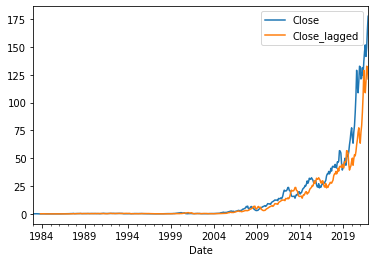

In [84]:
aapl_df['Close'].asfreq('M',method='ffill').plot(legend=True)
shifted = aapl_df['Close'].asfreq('M',method='ffill').shift(10).plot(legend = True)
shifted.legend(['Close','Close_lagged'])

In [85]:
aapl_df['pct_change'] = aapl_df['Close'].pct_change()

In [86]:
aapl_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_lag1,pct_change
Date,,,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400,NaN,NaN
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200,0.137277,0.000000
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200,0.137277,0.073166
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000,0.147321,0.034096
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800,0.152344,-0.021977
1983-01-19,0.148996,0.151786,0.148438,0.150112,0.117487,169657600,0.148996,0.007490
1983-01-20,0.150112,0.166853,0.150112,0.166853,0.130590,707840000,0.150112,0.111523
1983-01-21,0.166853,0.174107,0.165179,0.166853,0.130590,402595200,0.166853,0.000000
1983-01-24,0.166853,0.166853,0.154576,0.157366,0.123165,315414400,0.166853,-0.056858


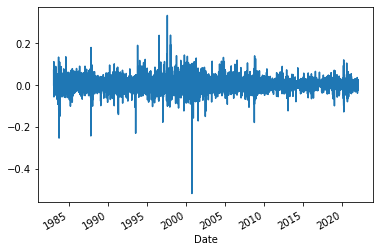

In [87]:
aapl_df['Close'].pct_change().plot()

In [88]:
aapl_df['Close_diff'] = aapl_df['Close'].diff()

Date
1983-01-12         NaN
1983-01-13    0.000000
1983-01-14    0.010044
1983-01-17    0.005023
1983-01-18   -0.003348
Name: Close, dtype: float64


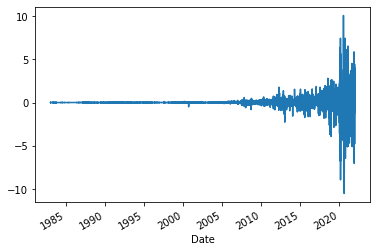

In [89]:
print(aapl_df['Close'].diff().head())
aapl_df['Close'].diff().plot()

Date
1983-01-12         NaN
1983-01-13    0.000000
1983-01-14    0.073166
1983-01-17    0.034096
1983-01-18   -0.021977
Name: Close, dtype: float64


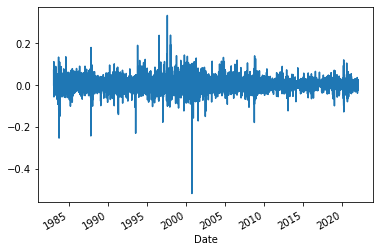

In [90]:
print((aapl_df['Close'] /aapl_df['Close'].shift(1) -1).head())
(aapl_df['Close'] /aapl_df['Close'].shift(1) -1).plot()

Date
1983-01-12         NaN
1983-01-13    0.000000
1983-01-14    0.073166
1983-01-17    0.034096
1983-01-18   -0.021977
Name: Close, dtype: float64


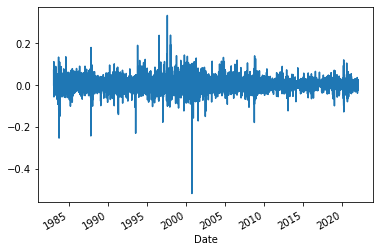

In [91]:
print((aapl_df['Close'].diff() /aapl_df['Close'].shift(1)).head())
(aapl_df['Close'].diff() /aapl_df['Close'].shift(1)).plot()

In [92]:
aapl_df['MA'] = aapl_df['Close'].rolling(window = 5).mean()

In [93]:
aapl_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_lag1,pct_change,Close_diff,MA
Date,,,,,,,,,,
1983-01-12,0.131696,0.140625,0.131696,0.137277,0.107442,176982400,NaN,NaN,NaN,NaN
1983-01-13,0.137277,0.138393,0.135045,0.137277,0.107442,82275200,0.137277,0.000000,0.000000,NaN
1983-01-14,0.137835,0.147321,0.137835,0.147321,0.115303,184643200,0.137277,0.073166,0.010044,NaN
1983-01-17,0.147321,0.154576,0.146205,0.152344,0.119234,234864000,0.147321,0.034096,0.005023,NaN
1983-01-18,0.152344,0.155692,0.145089,0.148996,0.116614,219788800,0.152344,-0.021977,-0.003348,0.144643
1983-01-19,0.148996,0.151786,0.148438,0.150112,0.117487,169657600,0.148996,0.007490,0.001116,0.147210
1983-01-20,0.150112,0.166853,0.150112,0.166853,0.130590,707840000,0.150112,0.111523,0.016741,0.153125
1983-01-21,0.166853,0.174107,0.165179,0.166853,0.130590,402595200,0.166853,0.000000,0.000000,0.157032
1983-01-24,0.166853,0.166853,0.154576,0.157366,0.123165,315414400,0.166853,-0.056858,-0.009487,0.158036


In [94]:
type(aapl_df['Close'].rolling(window = 5))

pandas.core.window.rolling.Rolling

#### Resampling
* Upsampling : 시계열을 Low frequency에서 high frequency로 변환한다. 누란된 데이터를 채우거나 보간하는 방법을 포함한다. (월간 -> 일)

* Downsampling : 시계열을 high frequency에서 low frequency로 변환한다. 기존 데이터를 집계하는 것을 포함.(주간 -> 월 ) or (일간 -> 주간)

=> 하지만 금융시계열 같은 경우는 각 시간 데이터가 중요하기에 Downsampling을 살펴보겠다

In [95]:
import pandas as pd
index = pd.date_range(start = '2019-01-01',end= '2019-10-01',freq='B')
series = pd.Series(range(len(index)), index=index)

In [96]:
series.resample(rule='M').sum()

2019-01-31     253
2019-02-28     650
2019-03-31    1113
2019-04-30    1639
2019-05-31    2231
2019-06-30    2370
2019-07-31    3220
2019-08-31    3575
2019-09-30    3864
2019-10-31     195
Freq: M, dtype: int64

In [97]:
series.resample(rule='M').last()

2019-01-31     22
2019-02-28     42
2019-03-31     63
2019-04-30     85
2019-05-31    108
2019-06-30    128
2019-07-31    151
2019-08-31    173
2019-09-30    194
2019-10-31    195
Freq: M, dtype: int64

In [98]:
series.resample(rule='MS').first()

2019-01-01      0
2019-02-01     23
2019-03-01     43
2019-04-01     64
2019-05-01     86
2019-06-01    109
2019-07-01    129
2019-08-01    152
2019-09-01    174
2019-10-01    195
Freq: MS, dtype: int64